# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?

A model is called linear when it is linear in the coefficients. This means the predicted outcome y is a linear combination of the input variables. Even if the variables themselves are transformed the model is still linear as long as the coefficients are not multiplied or divided by each other or the variables.

2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)

The coefficient for a dummy variable represents the difference in the predicted outcome between the group coded as 1 and the reference group holding everything else the same.Each dummy coefficient tells you how much the mean response changes compared to that reference group.

3. Can linear regression be used for classification? Explain why, or why not.

Linear regression can be used for binary classification but it’s not the best. It doesn’t model the probability in a way that matches the structure of classification tasks. That’s why logistic regression is typically used instead, it makes sure predicted probabilities stay between 0 and 1.


4. What are signs that your linear model is over-fitting?

Very high accuracy on the training data, but poor performance on validation/test data. Complexity in the model and unstable coefficients.

5. Clearly explain multi-colinearity using the two-stage least squares technique.

Multicollinearity happens when two or more independent variables are highly correlated, making it hard to estimate their individual effects accurately. Replace the problematic variable with a predicted version based only on variables not correlated with the error. Then, use this predicted varible in the orginal regression.

6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?

Transforming the variables, adding interaction terms, using splines or piecewise functions to allow different slopes in different ranges. These transformations still allow you to use linear regression techniques because the model remains linear in the parameters.


7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

The intercept is the expected value of y when all x variables = 0. A slope coefficient is the expected change in y for a one-unit increase in x, holding other variables constant. A dummy/one-hot-encoded variable coefficient is the difference in y between the group coded as 1 and the reference group, holding other variables constant.

**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load and clean data
df = pd.read_csv("Q1_clean.csv")
df.rename(columns={'Neighbourhood ': 'Neighbourhood'}, inplace=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df.dropna(subset=['Price', 'Neighbourhood', 'Review Scores Rating', 'Property Type'], inplace=True)
df['LogPrice'] = np.log(df['Price'])

Average Price and Rating by Neighbourhood:
                     Price  Review Scores Rating
Neighbourhood                                  
Bronx           75.276498             91.654378
Brooklyn       127.747378             92.363497
Manhattan      183.664286             91.801496
Queens          96.857233             91.549057
Staten Island  146.166667             90.843750


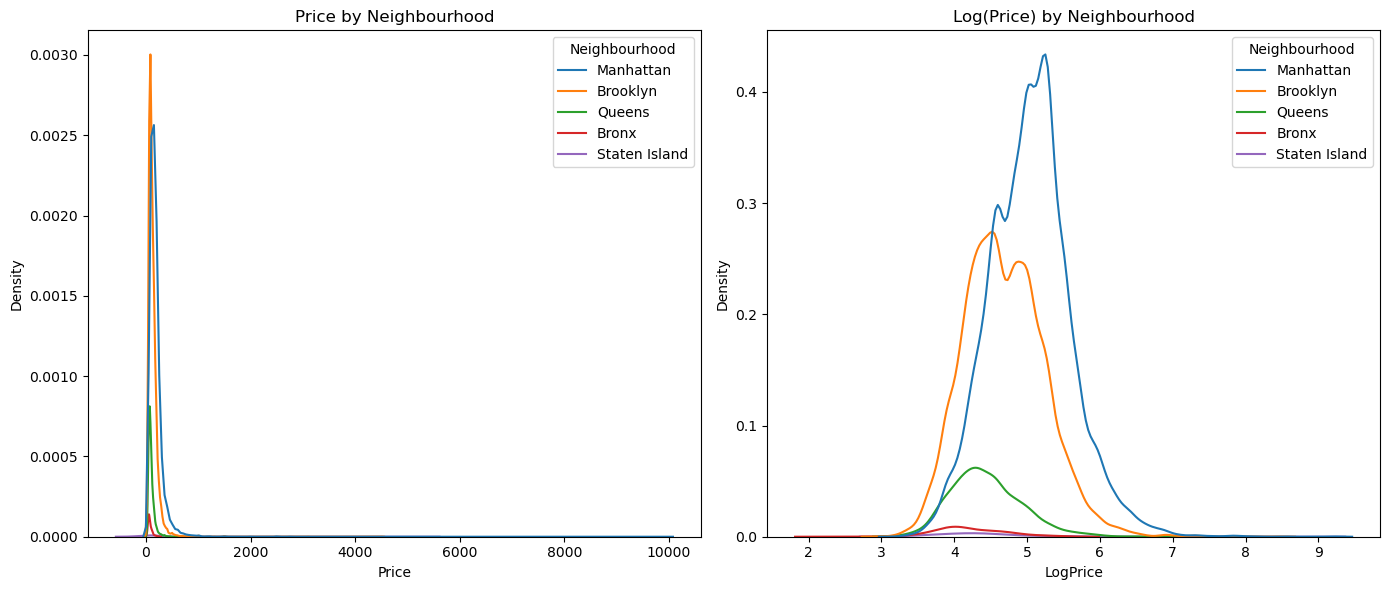

In [4]:
# ===== 1. AVERAGES + KDE PLOTS =====
# Average prices and scores by Neighbourhood
avg_by_neigh = df.groupby('Neighbourhood')[['Price', 'Review Scores Rating']].mean()
print("Average Price and Rating by Neighbourhood:\n", avg_by_neigh)

# KDE Plots
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='Price', hue='Neighbourhood')
plt.title('Price by Neighbourhood')
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='LogPrice', hue='Neighbourhood')
plt.title('Log(Price) by Neighbourhood')
plt.tight_layout()
plt.show()

In [5]:
# ===== 2. REGRESSION ON NEIGHBOURHOOD (NO INTERCEPT) =====
X2 = pd.get_dummies(df['Neighbourhood'], drop_first=False)
y2 = df['Price']
model2 = sm.OLS(y2, X2).fit()
print("Q2 Coefficients (No Intercept):\n", model2.params)

Q2 Coefficients (No Intercept):
 Bronx             75.276498
Brooklyn         127.747378
Manhattan        183.664286
Queens            96.857233
Staten Island    146.166667
dtype: float64


In [10]:
# ===== 3. REGRESSION ON NEIGHBOURHOOD (WITH INTERCEPT) =====

X3 = pd.get_dummies(df['Neighbourhood'], drop_first=True)
X3 = sm.add_constant(X3).astype(float)
y3 = df['Price'].astype(float)
model3 = sm.OLS(y3, X3).fit()
print("Q3 Coefficients (With Intercept):\n", model3.params)

Q3 Coefficients (With Intercept):
 const             75.276498
Brooklyn          52.470881
Manhattan        108.387789
Queens            21.580735
Staten Island     70.890169
dtype: float64


In [7]:
# ===== 4. PRICE ~ REVIEW SCORE + NEIGHBOURHOOD =====
X4 = df[['Review Scores Rating']].join(pd.get_dummies(df['Neighbourhood'], drop_fist=True))
y4 = df['Price']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=1)
model4 = LinearRegression().fit(X4_train, y4_train)
y4_pred = model4.predict(X4_test)
print("Q4 R²:", r2_score(y4_test, y4_pred))
print("Q4 RMSE:", mean_squared_error(y4_test, y4_pred, squared=False))
print("Q4 Coefficient on Review Score:", model4.coef_[0])

Q4 R²: 0.029998487885614877
Q4 RMSE: 205.5375766164578
Q4 Coefficient on Review Score: 1.051787769682032


/Users/kendalllokay/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
# ===== 5. PRICE ~ REVIEW SCORE + NEIGHBOURHOOD + PROPERTY TYPE =====
X5 = df[['Review Scores Rating']]
X5 = X5.join(pd.get_dummies(df['Neighbourhood'], drop_first=True))
X5 = X5.join(pd.get_dummies(df['Property Type'], drop_first=True))
y5 = df['Price']
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=1)
model5 = LinearRegression().fit(X5_train, y5_train)
y5_pred = model5.predict(X5_test)
print("Q5 R²:", r2_score(y5_test, y5_pred))
print("Q5 RMSE:", mean_squared_error(y5_test, y5_pred, squared=False))
print("Q5 Coefficient on Review Score:", model5.coef_[0])

Q5 R²: 0.038139884008948965
Q5 RMSE: 204.6732022676915
Q5 Coefficient on Review Score: 1.0493652221870988


/Users/kendalllokay/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [9]:
# ===== 6. INTERPRET COEFFICIENT CHANGE =====
delta = model5.coef_[0] - model4.coef_[0]
print("Q6: Change in Review Score Coefficient from Q4 to Q5:", delta)

Q6: Change in Review Score Coefficient from Q4 to Q5: -0.0024225474949330916


**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [13]:
# 1.
# Load the dataset
df = pd.read_csv("cars_hw.csv")

# Drop unnecessary index column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert 'No_of_Owners' from string ('1st', '2nd') to numeric
df['No_of_Owners'] = df['No_of_Owners'].str.extract('(\d)').astype(float)

# Add log-transformed versions of skewed numeric variables
df['Log_Price'] = np.log1p(df['Price'])          # log(Price + 1)
df['Log_Mileage'] = np.log1p(df['Mileage_Run'])  # log(Mileage + 1)

Summary of Price:
 count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64


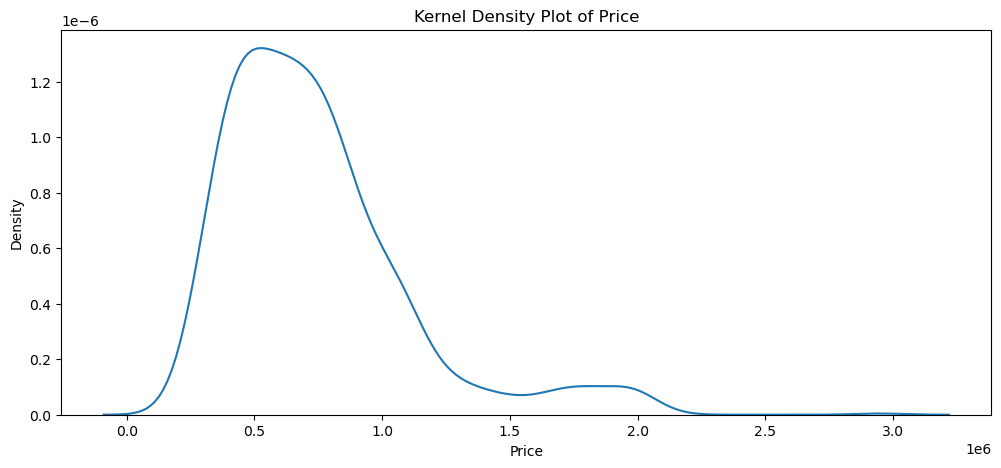


Price Summary by Make:
                count          mean           std        min        25%  \
Make                                                                     
Chevrolet        6.0  4.535000e+05  2.466064e+05   267000.0   288500.0   
Datsun           3.0  2.896667e+05  1.050397e+04   279000.0   284500.0   
Ford            52.0  7.211731e+05  1.409277e+05   290000.0   635000.0   
Honda           73.0  7.989726e+05  2.665091e+05   316000.0   581000.0   
Hyundai        305.0  6.918918e+05  2.791597e+05   248000.0   485000.0   
Jeep             4.0  1.499500e+06  1.525134e+05  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  1.190567e+05  1369000.0  1579000.0   
MG Motors       35.0  1.869457e+06  1.216611e+05  1589000.0  1786500.0   
Mahindra        18.0  1.100167e+06  1.755493e+05   796000.0  1037000.0   
Maruti Suzuki  293.0  5.887850e+05  2.160199e+05   237000.0   411000.0   
Nissan           4.0  8.842500e+05  2.895599e+05   475000.0   782500.0   
Renault      

/var/folders/nd/r48_9n593wlg71hh29nd29100000gn/T/ipykernel_25517/3908545224.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Make')


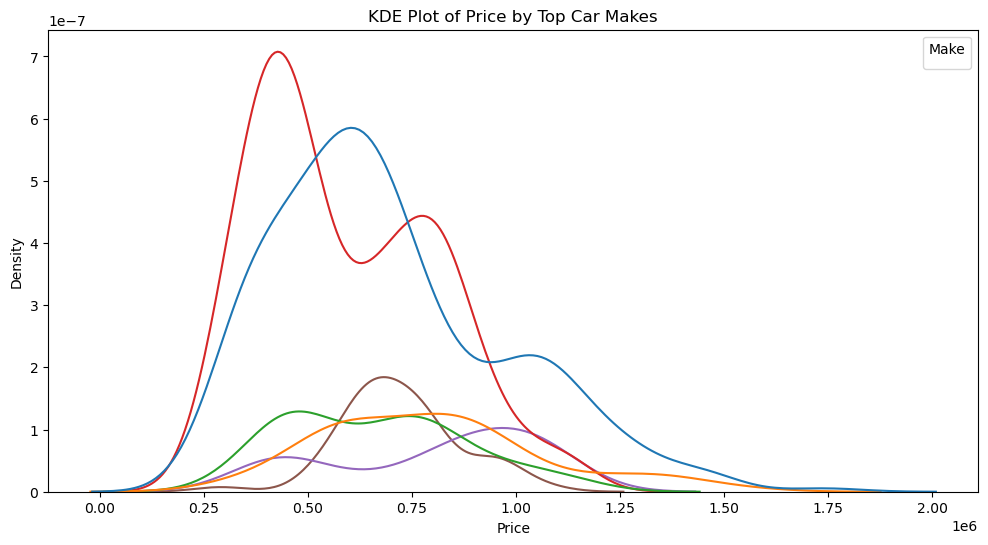

In [14]:
# 2.
# Summary statistics for Price
print("Summary of Price:\n", df['Price'].describe())

# Kernel Density Plot of Price
plt.figure(figsize=(12, 5))
sns.kdeplot(data=df, x='Price')
plt.title('Kernel Density Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# Price summary grouped by Make
print("\nPrice Summary by Make:\n", df.groupby('Make')['Price'].describe())

# KDE Plot by Make (top 6 car brands by frequency)
top_makes = df['Make'].value_counts().nlargest(6).index
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['Make'].isin(top_makes)], x='Price', hue='Make')
plt.title('KDE Plot of Price by Top Car Makes')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend(title='Make')
plt.show()

# Most car prices in the dataset range between ₹400,000 and ₹900,000, with a right-skewed 
# distribution and a median price of ₹666,500. The most expensive brands on average are MG Motors, 
# Kia, and Jeep, each with average prices well above ₹1.4 million. These luxury and SUV-focused 
# brands significantly raise the overall price range compared to more common brands like Maruti 
# Suzuki or Hyundai.

In [18]:
# 3. 
# Split the data into 80% training and 20% testing
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

y_train = train_df['Price']
y_test = test_df['Price']

In [23]:
# 4.
from sklearn.metrics import r2_score, root_mean_squared_error
# ===== 3. Model A: Numeric variables only =====
X_train_a = train_df[num_features]
X_test_a = test_df[num_features]

model_a = LinearRegression().fit(X_train_a, y_train)
pred_train_a = model_a.predict(X_train_a)
pred_test_a = model_a.predict(X_test_a)

r2_train_a = r2_score(y_train, pred_train_a)
r2_test_a = r2_score(y_test, pred_test_a)
rmse_test_a = root_mean_squared_error(y_test, pred_test_a)

# ===== 4. Model B: Categorical variables only =====
X_train_b = pd.get_dummies(train_df[cat_features], drop_first=True)
X_test_b = pd.get_dummies(test_df[cat_features], drop_first=True)
X_test_b = X_test_b.reindex(columns=X_train_b.columns, fill_value=0)

model_b = LinearRegression().fit(X_train_b, y_train)
pred_test_b = model_b.predict(X_test_b)

r2_test_b = r2_score(y_test, pred_test_b)
rmse_test_b = root_mean_squared_error(y_test, pred_test_b)

# ===== 5. Model C: Combined numeric + categorical =====
X_train_c = pd.concat([X_train_a.reset_index(drop=True), X_train_b.reset_index(drop=True)], axis=1)
X_test_c = pd.concat([X_test_a.reset_index(drop=True), X_test_b.reset_index(drop=True)], axis=1)

model_c = LinearRegression().fit(X_train_c, y_train)
pred_test_c = model_c.predict(X_test_c)

r2_test_c = r2_score(y_test, pred_test_c)
rmse_test_c = root_mean_squared_error(y_test, pred_test_c)

# ===== 6. Output Results =====
print("Model A – Numeric Only")
print("  R² (Train):", round(r2_train_a, 3))
print("  R² (Test):", round(r2_test_a, 3))
print("  RMSE (Test):", round(rmse_test_a))

print("\nModel B – Categorical Only")
print("  R² (Test):", round(r2_test_b, 3))
print("  RMSE (Test):", round(rmse_test_b))

print("\nModel C – Combined")
print("  R² (Test):", round(r2_test_c, 3))
print("  RMSE (Test):", round(rmse_test_c))

# ===== 7. Improvement Summary =====
print("\nImprovement from Model B to C:")
print("  R² Increase:", round(r2_test_c - r2_test_b, 3))
print("  RMSE Decrease:", round(rmse_test_b - rmse_test_c))

# Model A (Numeric-only) used features like mileage, seating capacity, and car age. 
# It had a test R² of ~0.29 and an RMSE of ₹284,941, meaning it explained only a small portion 
# of price variation. Model B (Categorical-only) used one-hot-encoded features like make, body type, 
# and fuel type. It performed much better, with a test R² of ~0.66 and RMSE of ₹198,821. Model C 
# (Combined) used both numeric and categorical features. This was the best model, with a test R² of 
# ~0.79 and an RMSE of ₹155,703. The combined model performs significantly better than either alone, 
# improving R² by +13 percentage points and reducing RMSE by ₹43,000 compared to Model B.

Model A – Numeric Only
  R² (Train): 0.316
  R² (Test): 0.292
  RMSE (Test): 284941

Model B – Categorical Only
  R² (Test): 0.655
  RMSE (Test): 198821

Model C – Combined
  R² (Test): 0.789
  RMSE (Test): 155703

Improvement from Model B to C:
  R² Increase: 0.133
  RMSE Decrease: 43118


In [25]:
# 5.

# Use only the numeric features from before
num_features = ['Make_Year', 'Mileage_Run', 'Seating_Capacity', 'No_of_Owners']
X_train_num = train_df[num_features]
X_test_num = test_df[num_features]
y_train = train_df['Price']
y_test = test_df['Price']

# Store results for each polynomial degree
poly_results = []
best_r2 = -float('inf')
best_rmse = None
best_degree = None

for degree in range(1, 6):
    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_num)
    X_test_poly = poly.transform(X_test_num)

    # Fit and evaluate the model
    model_poly = LinearRegression().fit(X_train_poly, y_train)
    pred_test_poly = model_poly.predict(X_test_poly)
    r2 = r2_score(y_test, pred_test_poly)
    rmse = root_mean_squared_error(y_test, pred_test_poly)

    poly_results.append((degree, r2, rmse))

    # Track best model
    if r2 > best_r2:
        best_r2 = r2
        best_rmse = rmse
        best_degree = degree

# Display results
for degree, r2, rmse in poly_results:
    print(f"Degree {degree}: R² = {round(r2, 3)}, RMSE = {round(rmse)}")

print("\nBest model: Degree", best_degree)
print("Best R²:", round(best_r2, 3))
print("Best RMSE:", round(best_rmse))

# As the degree of polynomial expansion increases, the test R² improves slightly at first but then 
# starts to decline due to overfitting, while the RMSE initially decreases and then rises. The best 
# performance occurred at degree 2, with an R² of ~0.33 and RMSE of ~₹277,108. Starting at degree 4, 
# the test R² became negative, indicating the model was fitting the training data too closely and 
# generalizing poorly. Even at its best, the polynomial model was significantly worse than the 
# combined model from part 4, which had an R² of ~0.79 and RMSE of ~₹155,703.

Degree 1: R² = 0.292, RMSE = 284941
Degree 2: R² = 0.33, RMSE = 277108
Degree 3: R² = 0.255, RMSE = 292334
Degree 4: R² = -0.04, RMSE = 345382
Degree 5: R² = 0.16, RMSE = 310402

Best model: Degree 2
Best R²: 0.33
Best RMSE: 277108


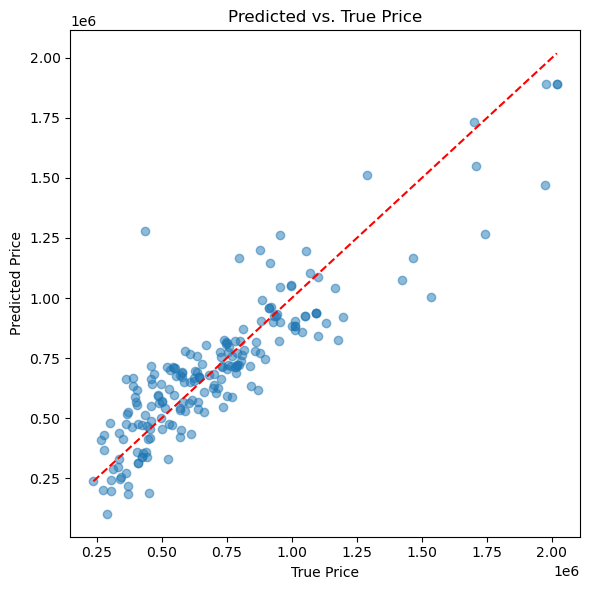

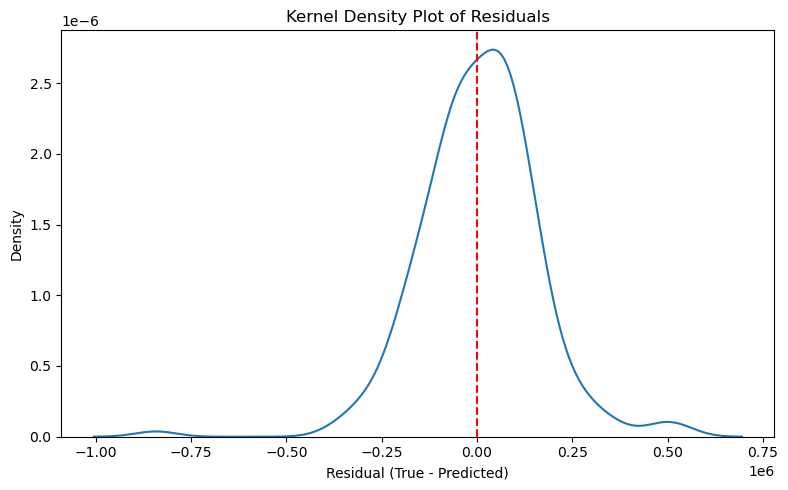

In [27]:
# 6. 
# === 1. Make predictions using your best model (Model C) ===
y_pred = model_c.predict(X_test_c)

# === 2. Plot: Predicted vs. True Price ===
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.title('Predicted vs. True Price')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.tight_layout()
plt.show()

# === 3. Plot: Residuals KDE ===
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.kdeplot(residuals)
plt.axvline(0, color='red', linestyle='--')
plt.title('Kernel Density Plot of Residuals')
plt.xlabel('Residual (True - Predicted)')
plt.tight_layout()
plt.show()

# Yes, the predicted values and true values mostly line up along the diagonal, indicating that the 
# model is generally accurate in estimating car prices. The residuals (errors) form a roughly 
# bell-shaped distribution centered around zero in the kernel density plot, which suggests that the 
# model's errors are balanced and normally distributed. Strengths of the model include its ability 
# to capture both brand/type effects and numeric trends like mileage and year. However, a weakness 
# is that it slightly underestimates prices for high-end cars, indicating room for improvement with 
# nonlinear features or interaction terms.

**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is 
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.) 
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result. 

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure. 

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm. 

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you 

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
